In [1]:
import xarray as xr
import numpy as np
import cmocean.cm as cm
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr

In [2]:
import salishsea_tools.river_202108 as rivers

In [3]:
jetty_mask = xr.open_dataset('jetty_mask_bathy202108.nc')
# jetty_mask

In [4]:
nav_lon = jetty_mask.nav_lon.to_numpy()
nav_lat = jetty_mask.nav_lat.to_numpy()
nav_lon.shape

(898, 398)

In [5]:
jetty_mask.bfr_coef_u

<xarray.DataArray 'bfr_coef_u' (y: 898, x: 398)>
[357404 values with dtype=float64]
Dimensions without coordinates: y, x
Attributes:
    units:      none
    long_name:  friction_x_binary_mask

In [6]:
# jetty_mask.bfr_coef_u.to_numpy().shape
blank = np.zeros((40, 898, 398))

In [7]:
# river = xr.open_dataset('/home/sallen/MEOPAR/tools/I_ForcingFiles/Rivers/ncfiles/R202108Dailies_y2017m09d29.nc')
# freshwater_bool = river.rorunoff.to_numpy() != 0
# freshwater_all = freshwater_bool[0]*13

In [8]:
with_rivers = np.copy(blank)

In [9]:
wshed_list = list(rivers.prop_dict.keys())
for wshed in wshed_list:
    riv_list = rivers.prop_dict[wshed].keys()
    for riv in riv_list:
        i = rivers.prop_dict[wshed][riv]['i']
        di = rivers.prop_dict[wshed][riv]['di']
        j = rivers.prop_dict[wshed][riv]['j']
        dj = rivers.prop_dict[wshed][riv]['dj']
        depth = rivers.prop_dict[wshed][riv]['depth']

        with_rivers[0:rivers.prop_dict[wshed][riv]['depth'], rivers.prop_dict[wshed][riv]['i']+1:rivers.prop_dict[wshed][riv]['i']+1+rivers.prop_dict[wshed][riv]['di'], rivers.prop_dict[wshed][riv]['j']+1:rivers.prop_dict[wshed][riv]['j']+1+rivers.prop_dict[wshed][riv]['dj']] = 13

In [10]:
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish

with_rivers[0:rivers.prop_dict['fraser']['Nooksack']['depth'], rivers.prop_dict['fraser']['Nooksack']['i']+1:rivers.prop_dict['fraser']['Nooksack']['i']+1+rivers.prop_dict['fraser']['Nooksack']['di'], rivers.prop_dict['fraser']['Nooksack']['j']+1:rivers.prop_dict['fraser']['Nooksack']['j']+1+rivers.prop_dict['fraser']['Nooksack']['dj']] = 1
with_rivers[0:rivers.prop_dict['skagit']['Skagit1']['depth'], rivers.prop_dict['skagit']['Skagit1']['i']+1:rivers.prop_dict['skagit']['Skagit1']['i']+1+rivers.prop_dict['skagit']['Skagit1']['di'], rivers.prop_dict['skagit']['Skagit1']['j']+1:rivers.prop_dict['skagit']['Skagit1']['j']+1+rivers.prop_dict['skagit']['Skagit1']['dj']] = 2
with_rivers[0:rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['depth'], rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['i']+1:rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['i']+1+rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['di'], rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['j']+1:rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['j']+1+rivers.prop_dict['skagit']['SnohomishAllenQuilceda']['dj']] = 3
with_rivers[0:rivers.prop_dict['puget']['NisquallyMcAllister']['depth'], rivers.prop_dict['puget']['NisquallyMcAllister']['i']+1:rivers.prop_dict['puget']['NisquallyMcAllister']['i']+1+rivers.prop_dict['puget']['NisquallyMcAllister']['di'], rivers.prop_dict['puget']['NisquallyMcAllister']['j']+1:rivers.prop_dict['puget']['NisquallyMcAllister']['j']+1+rivers.prop_dict['puget']['NisquallyMcAllister']['dj']] = 4
with_rivers[0:rivers.prop_dict['jdf']['Elwha']['depth'], rivers.prop_dict['jdf']['Elwha']['i']+1:rivers.prop_dict['jdf']['Elwha']['i']+1+rivers.prop_dict['jdf']['Elwha']['di'], rivers.prop_dict['jdf']['Elwha']['j']+1:rivers.prop_dict['jdf']['Elwha']['j']+1+rivers.prop_dict['jdf']['Elwha']['dj']] = 5
with_rivers[0:rivers.prop_dict['evi_s']['Cowichan1']['depth'], rivers.prop_dict['evi_s']['Cowichan1']['i']+1:rivers.prop_dict['evi_s']['Cowichan1']['i']+1+rivers.prop_dict['evi_s']['Cowichan1']['di'], rivers.prop_dict['evi_s']['Cowichan1']['j']+1:rivers.prop_dict['evi_s']['Cowichan1']['j']+1+rivers.prop_dict['evi_s']['Cowichan1']['dj']] = 6
with_rivers[0:rivers.prop_dict['evi_s']['Nanaimo1']['depth'], rivers.prop_dict['evi_s']['Nanaimo1']['i']+1:rivers.prop_dict['evi_s']['Nanaimo1']['i']+1+rivers.prop_dict['evi_s']['Nanaimo1']['di'], rivers.prop_dict['evi_s']['Nanaimo1']['j']+1:rivers.prop_dict['evi_s']['Nanaimo1']['j']+1+rivers.prop_dict['evi_s']['Nanaimo1']['dj']] = 7
with_rivers[0:rivers.prop_dict['evi_s']['Puntledge']['depth'], rivers.prop_dict['evi_s']['Puntledge']['i']+1:rivers.prop_dict['evi_s']['Puntledge']['i']+1+rivers.prop_dict['evi_s']['Puntledge']['di'], rivers.prop_dict['evi_s']['Puntledge']['j']+1:rivers.prop_dict['evi_s']['Puntledge']['j']+1+rivers.prop_dict['evi_s']['Puntledge']['dj']] = 8
with_rivers[0:rivers.prop_dict['evi_n']['SalmonSayward']['depth'], rivers.prop_dict['evi_n']['SalmonSayward']['i']+1:rivers.prop_dict['evi_n']['SalmonSayward']['i']+1+rivers.prop_dict['evi_n']['SalmonSayward']['di'], rivers.prop_dict['evi_n']['SalmonSayward']['j']+1:rivers.prop_dict['evi_n']['SalmonSayward']['j']+1+rivers.prop_dict['evi_n']['SalmonSayward']['dj']] = 9
with_rivers[0:rivers.prop_dict['bute']['Homathko']['depth'], rivers.prop_dict['bute']['Homathko']['i']+1:rivers.prop_dict['bute']['Homathko']['i']+1+rivers.prop_dict['bute']['Homathko']['di'], rivers.prop_dict['bute']['Homathko']['j']+1:rivers.prop_dict['bute']['Homathko']['j']+1+rivers.prop_dict['bute']['Homathko']['dj']] = 10
with_rivers[0:rivers.prop_dict['howe']['Squamish']['depth'], rivers.prop_dict['howe']['Squamish']['i']+1:rivers.prop_dict['howe']['Squamish']['i']+1+rivers.prop_dict['howe']['Squamish']['di'], rivers.prop_dict['howe']['Squamish']['j']+1:rivers.prop_dict['howe']['Squamish']['j']+1+rivers.prop_dict['howe']['Squamish']['dj']] = 11
with_rivers[0:rivers.prop_dict['fraser']['Fraser']['depth'], rivers.prop_dict['fraser']['Fraser']['i']+1:rivers.prop_dict['fraser']['Fraser']['i']+1+rivers.prop_dict['fraser']['Fraser']['di'], rivers.prop_dict['fraser']['Fraser']['j']+1:rivers.prop_dict['fraser']['Fraser']['j']+1+rivers.prop_dict['fraser']['Fraser']['dj']] = 12

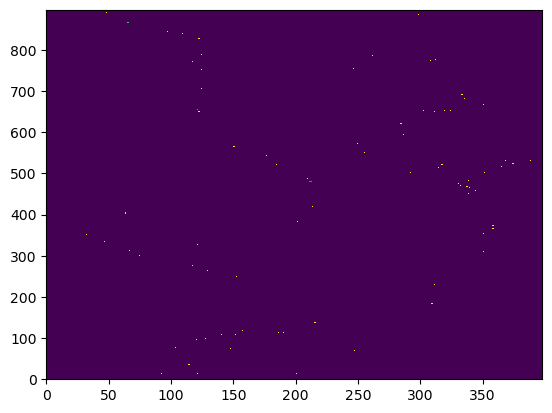

In [11]:
plt.pcolormesh(with_rivers[0,:,:])

In [15]:
np.savetxt('rivers_array.csv', with_rivers[0,:,:])

In [13]:
notebook = 'make_dye_mask.ipynb'
coords = {
    'x' : range(398),
    'y' : range(898),
    'depth' : range(40),
}
var_attrs = {'units': '1',
                    'long_name': 'fw_tag'}

filename = "river_mask_3D_bathy202108_shifted.nc"

netcdf_title = f'Rivers tags'
ds_attrs = {
        'acknowledgements':
            'Created for dye tracers',
        'creator_email':
            'cdonaldson@eoas.ubc.ca',
        'creator_name':
            'Salish Sea MEOPAR Project Contributors',
        'creator_url':
            'https://salishsea-meopar-docs.readthedocs.org/',
        'institution':
            'UBC EOAS',
        'institution_fullname': (
            'Earth, Ocean & Atmospheric Sciences,'
            ' University of British Columbia'
        ),
        'title': netcdf_title,
        'notebook': notebook,
        # 'rivers_base': prop_dict_name,
        'summary': f'River Tags for Bathymetry 202108',
        'history': (
            '[{}] File creation.'
            .format(dt.datetime.today().strftime('%Y-%m-%d'))
        )
        }

da = xr.DataArray(
        data = with_rivers,
        name='freshwater',
        dims=('depth', 'y', 'x'),
        coords = coords,
        attrs = var_attrs)

var_attrs = {'units': 'degrees',
                    'long_name': 'longitude'}

lon = xr.DataArray(
    data = nav_lon,
    name ='nav_lon',
    dims=('y', 'x'),
    coords={
    'x' : range(398),
    'y' : range(898),},
    attrs=var_attrs
)

var_attrs = {'units': 'degrees',
                    'long_name': 'latitude'}

lat = xr.DataArray(
    data = nav_lat,
    name ='nav_lat',
    dims=('y', 'x'),
    coords={
    'x' : range(398),
    'y' : range(898),},
    attrs=var_attrs
)


ds = xr.Dataset(
        data_vars={
        'freshwater': da, 'nav_lon': lon, 'nav_lat': lat},
        coords = coords,
        attrs = ds_attrs
    )

encoding = {var: {'zlib': True} for var in ds.data_vars}

ds.to_netcdf(filename, encoding=encoding,)

In [59]:
# def write_file(day, runoff, config):
#     "3D dye mask with 12 rivers numbered 1 to 12 and the rest as 13"
#     notebook = 'make_dye_mask.ipynb'
#     coords = {
#         'x' : range(398),
#         'y' : range(898),
#         'time_counter' : [0],
#     }
#     var_attrs = {'units': 'kg m-2 s-1',
#                       'long_name': 'runoff_flux'}
    
#     # set up filename 
#     directory = Path(config["rivers"]["rivers dir"])
#     filename_tmpls = config["rivers"]["file templates"][bathy_type]
        
#     filename = directory / filename_tmpls.format(day.date())
#     print (filename)
        
#     netcdf_title = f'Rivers for {day.date()}'
#     ds_attrs = {
#         'acknowledgements':
#             'Based on river fit',
#         'creator_email':
#             'sallen@eoas.ubc.ca',
#         'creator_name':
#             'Salish Sea MEOPAR Project Contributors',
#         'creator_url':
#             'https://salishsea-meopar-docs.readthedocs.org/',
#         'institution':
#             'UBC EOAS',
#         'institution_fullname': (
#             'Earth, Ocean & Atmospheric Sciences,'
#             ' University of British Columbia'
#         ),
#         'title': netcdf_title,
#         'notebook': notebook,
#         'rivers_base': prop_dict_name,
#         'summary': f'Daily Runoff for Bathymetry 202108',
#         'history': (
#             '[{}] File creation.'
#             .format(dt.datetime.today().strftime('%Y-%m-%d'))
#         )
#         }
#     runoffs = np.empty((1, runoff.shape[0], runoff.shape[1]))
#     runoffs[0] = runoff

#     da = xr.DataArray(
#             data = runoffs,
#             name='rorunoff',
#             dims=('time_counter', 'y', 'x'),
#             coords = coords,
#             attrs = var_attrs)
    

#     ds = xr.Dataset(
#             data_vars={
#             'rorunoff': da},
#             coords = coords,
#             attrs = ds_attrs
#         )
    
#     encoding = {var: {'zlib': True} for var in ds.data_vars}

#     ds.to_netcdf(filename, unlimited_dims=('time_counter'),
#             encoding=encoding,)

In [60]:
# data_xr = xr.DataArray(with_rivers, coords={'y': jetty_mask.nav_lat,'x': jetty_mask.nav_lon}, dims=["y", "x"])

In [61]:
# river_mask = jetty_mask.drop_vars(('bfr_coef_u', 'bfr_coef_v'))
# river_mask = river_mask.assign(freshwater=(['y', 'x'], with_rivers))
# river_mask['freshwater'].plot()

In [62]:
# river_mask.to_netcdf('river_mask_bathy202108.nc')

In [63]:
# river_mask

In [64]:
# xr.open_dataset('jetty_mask_bathy202108.nc')

In [14]:
ds

<xarray.Dataset>
Dimensions:     (x: 398, y: 898, depth: 40)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * y           (y) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * depth       (depth) int64 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
Data variables:
    freshwater  (depth, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon     (y, x) float64 -123.4 -123.4 -123.4 ... -124.4 -124.3 -124.3
    nav_lat     (y, x) float64 46.86 46.86 46.86 46.87 ... 51.1 51.1 51.1 51.1
Attributes:
    acknowledgements:      Created for dye tracers
    creator_email:         cdonaldson@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers tags
    notebook:              make_dye_mask.ipynb
    summary:               River Tags for Bathymetry 202108
    history:               [2023-10-16] File creation.

In [66]:
# xr.open_dataset('river_mask_bathy202108.nc').nav_lon

In [16]:
xr.open_dataset('river_mask_3D_bathy202108_shifted.nc')

<xarray.Dataset>
Dimensions:     (x: 398, y: 898, depth: 40)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * y           (y) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * depth       (depth) int64 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
Data variables:
    freshwater  (depth, y, x) float64 ...
    nav_lon     (y, x) float64 ...
    nav_lat     (y, x) float64 ...
Attributes:
    acknowledgements:      Created for dye tracers
    creator_email:         cdonaldson@eoas.ubc.ca
    creator_name:          Salish Sea MEOPAR Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 Rivers tags
    notebook:              make_dye_mask.ipynb
    summary:               River Tags for Bathymetry 202108
    history:               [2023-10-16] File creation.